In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
rectifier = pd.read_csv("data/parser/rectifier.csv")
print(rectifier.shape)
rectifier.head()

(20, 17)


,整流器,項目,檢測日期,排流點電位_mv,自動回授電位_mv,接地棒阻抗_Ω,鈦陽極接地電阻A1_Ω,鈦陽極接地電阻A2_Ω,鈦陽極接地電阻A3_Ω,鈦陽極接地電阻A4_Ω,鈦陽極總接地電阻_Ω,本次電力_KWH,平均電力值_KWH/日,交流輸入_A,交流輸入_V,直流輸出_A,直流輸出_V
0,24,109Q3,2020-07-21 00:00:00,-1447,-1348,6.32,4.56,4.52,4.65,5.91,4.28,3541,6.750000,0.65,230.9,1.55,3.80
1,24,109Q4,2020-12-01 00:00:00,-1371,-1298,6.86,5.72,5.73,5.85,6.81,5.48,4303,5.730000,1.74,231.6,1.81,1.87
2,24,110Q1,2021-01-22 00:00:00,-1492,-1318,3.20,2.28,2.33,2.35,3.64,2.22,4655,6.770000,0.68,231.0,1.56,3.77
3,24,110Q2,2021-04-29 00:00:00,-1217,-1182,6.82,5.43,5.65,6.73,7.44,5.36,5288,6.530000,0.84,235.0,2.10,3.76
4,24,110Q3,2021-07-20 00:00:00,-1457,-1198,1.10,1.79,2.61,2.84,3.19,2.19,5750,5.634146,0.74,230.2,1.75,3.77


## Grouping

In [6]:
rectifier1 = rectifier.select_dtypes("number")

# 切分不同整流站資料
rectifier_24 = rectifier1.query("整流器 == 24").drop("整流器", axis = 1) # 整流器24的連續資料
rectifier_25 = rectifier1.query("整流器 == 25").drop("整流器", axis = 1) # 整流器25的連續資料
rectifier_all = rectifier1.drop("整流器", axis = 1)

### HDBSCAN

In [7]:
# 分群
hdbscan_all = HDBSCAN(min_cluster_size = 2).fit(rectifier_all)
hdbscan_24 = HDBSCAN(min_cluster_size = 2).fit(rectifier_24)
hdbscan_25 = HDBSCAN(min_cluster_size = 2).fit(rectifier_25)
print(hdbscan_all.labels_, "\n")
print(hdbscan_24.labels_, hdbscan_25.labels_)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0] 

[0 0 0 0 0 0 1 1 1 1] [-1 -1  0  0  1  1  2  2  2 -1]


In [8]:
rectifier.loc[:9, "hdbscan"] = hdbscan_24.labels_
rectifier.loc[10:, "hdbscan"] = hdbscan_25.labels_

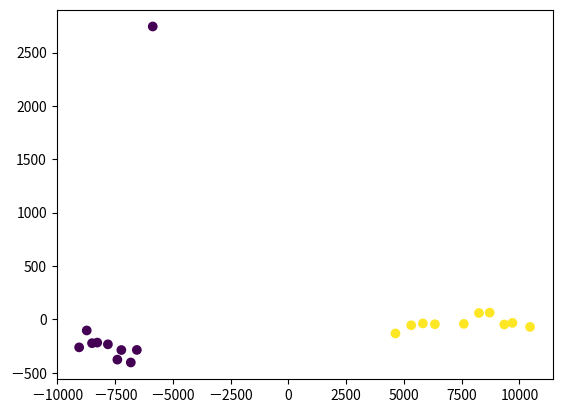

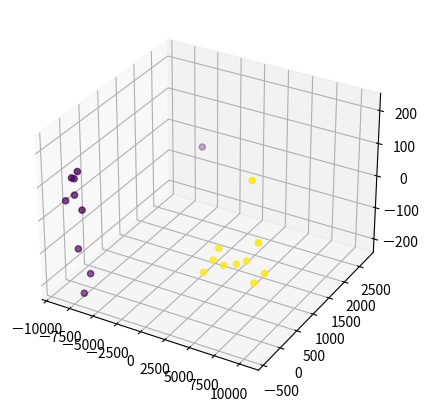

In [9]:
# 降維畫圖 (所有樣本)
pca = PCA(n_components = 2) # 初始化PCA，設定將特徵降維成2
X = pca.fit_transform(rectifier_all)
plt.scatter(X[:, 0], X[:, 1], c = hdbscan_all.labels_)

fig, ax = plt.subplots(1, 1, subplot_kw = dict(projection = '3d'), figsize = (15, 5))

pca = PCA(n_components = 3) # 初始化PCA，設定將特徵降維成3
X = pca.fit_transform(rectifier_all)
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = hdbscan_all.labels_)

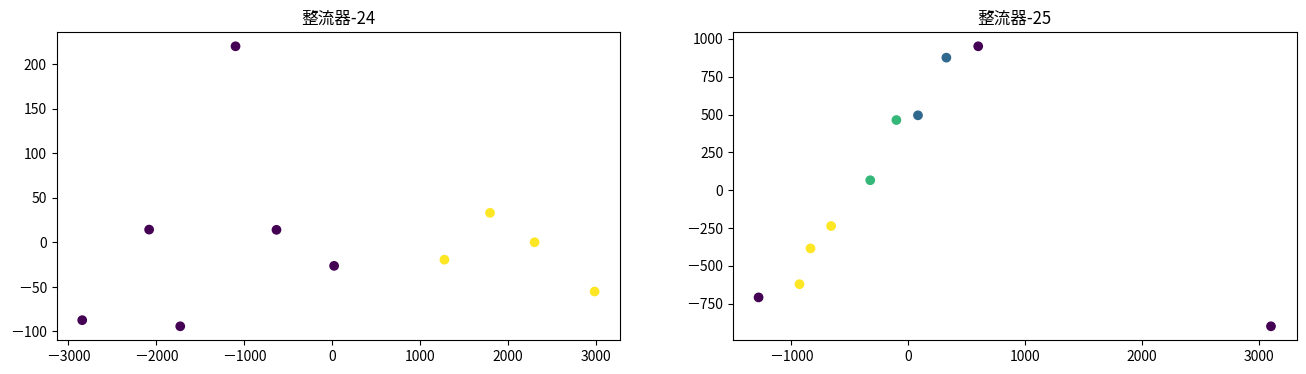

In [10]:
# 降維畫2D圖 (切分整流站)
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier_24)
ax[0].scatter(X[:, 0], X[:, 1], c = hdbscan_24.labels_)
ax[0].set_title("整流器-24")

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier_25)
ax[1].scatter(X[:, 0], X[:, 1], c = hdbscan_25.labels_)
ax[1].set_title("整流器-25")

plt.show()

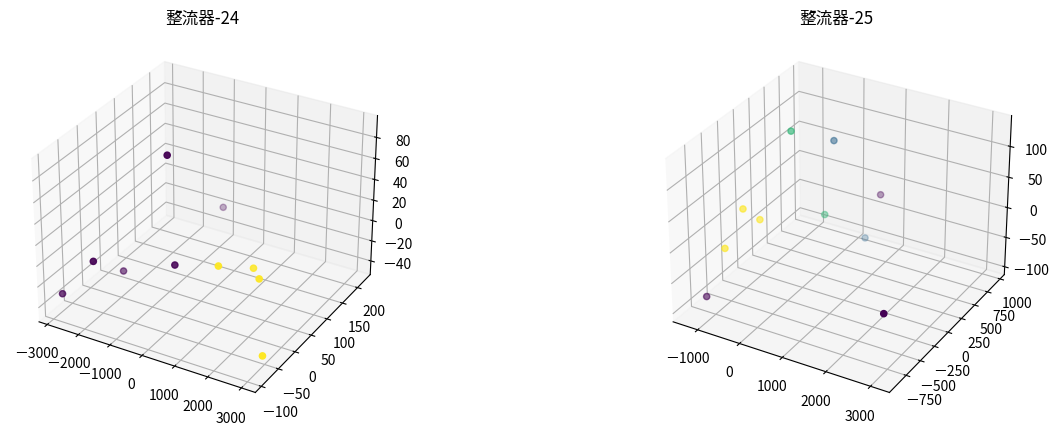

In [11]:
# 降維畫3D圖 (切分整流站)
fig, ax = plt.subplots(1, 2, subplot_kw = dict(projection = '3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier_24)
ax[0].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = hdbscan_24.labels_)
ax[0].set_title("整流器-24")


pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier_25)
ax[1].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = hdbscan_25.labels_)
ax[1].set_title("整流器-25")

plt.show()

### KMeans

In [12]:
from sklearn.cluster import KMeans

kmeans_all = KMeans(n_clusters = 2, n_init = "auto").fit(rectifier_all)
kmeans_24 = KMeans(n_clusters = 3, n_init = "auto").fit(rectifier_24)
kmeans_25 = KMeans(n_clusters = 3, n_init = "auto").fit(rectifier_25)
print(kmeans_all.labels_, "\n")
print(kmeans_24.labels_, kmeans_25.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1] 

[2 2 2 0 0 0 1 1 1 1] [1 2 2 2 2 0 0 0 0 0]


In [13]:
rectifier.loc[:9, "kmeans"] = kmeans_24.labels_
rectifier.loc[10:, "kmeans"] = kmeans_25.labels_

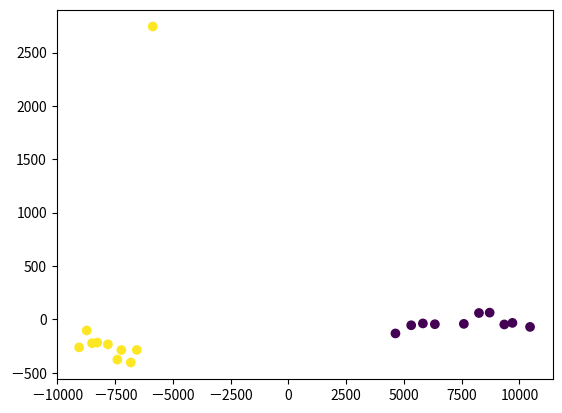

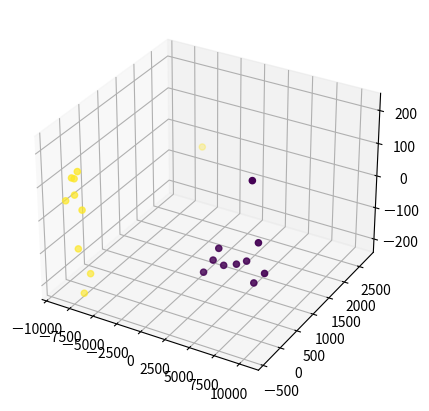

In [14]:
# 降維畫圖 (所有樣本)
pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier_all)
plt.scatter(X[:, 0], X[:, 1], c = kmeans_all.labels_)

fig, ax = plt.subplots(1, 1, subplot_kw = dict(projection = '3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier_all)
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = kmeans_all.labels_)

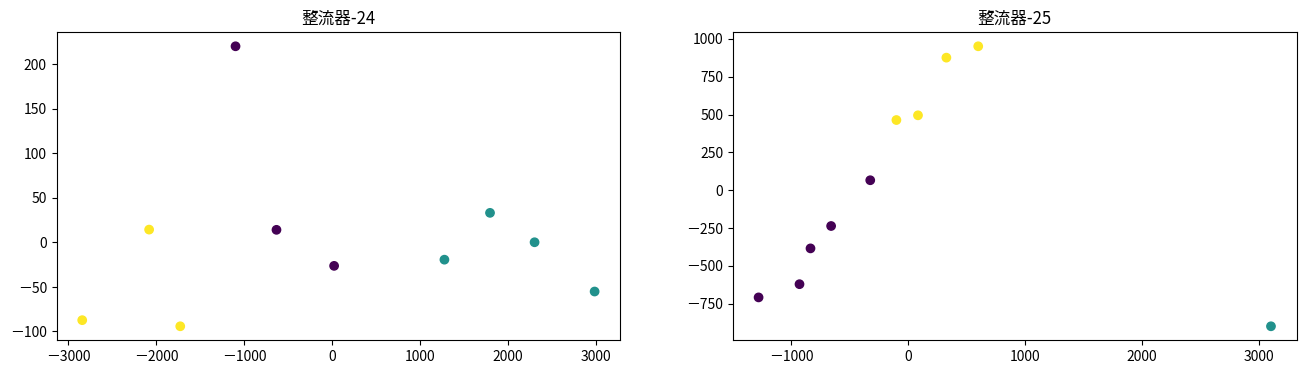

In [15]:
# 降維畫2D圖 (切分整流站)
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier_24)
ax[0].scatter(X[:, 0], X[:, 1], c = kmeans_24.labels_)
ax[0].set_title("整流器-24")

pca = PCA(n_components = 2)
X = pca.fit_transform(rectifier_25)
ax[1].scatter(X[:, 0], X[:, 1], c = kmeans_25.labels_)
ax[1].set_title("整流器-25")

plt.show()

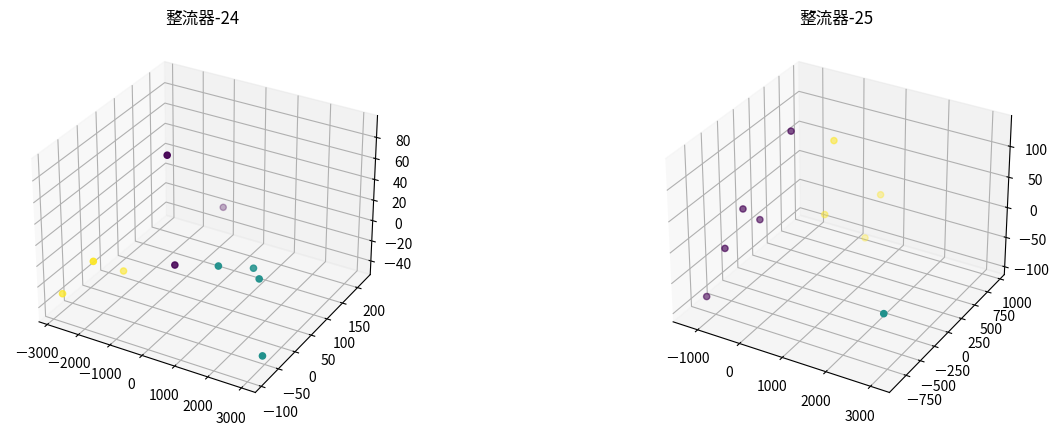

In [16]:
# 降維畫3D圖 (切分整流站)
fig, ax = plt.subplots(1, 2, subplot_kw = dict(projection = '3d'), figsize = (15, 5))

pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier_24)
ax[0].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = kmeans_24.labels_)
ax[0].set_title("整流器-24")


pca = PCA(n_components = 3)
X = pca.fit_transform(rectifier_25)
ax[1].scatter3D(X[:, 0], X[:, 1], X[:, 2], c = kmeans_25.labels_)
ax[1].set_title("整流器-25")

plt.show()

In [17]:
rectifier.to_csv("data/parser/group.csv", index = False)